In [1]:
# preparing package, object, and library
import pandas as pd
import numpy as np 

In [2]:
# open the csv file 
pd_feature1 = pd.read_csv("data_CKSNAP.csv")
pd_feature2 = pd.read_csv("data_PseKNC.csv")
pd_feature3 = pd.read_csv("data_PSTNPss.csv") # the feature that give the best accuracy

# get the label every feature
y_feature1 = pd_feature1['Target1'] # y_feature1 = y_feature2 = y_feature3 
y_feature2 = pd_feature2['Target2']
y_feature3 = pd_feature3['Target3']

# delete column target
del pd_feature1["Target1"]
del pd_feature2["Target2"]
del pd_feature3["Target3"]

x_feature1 = pd_feature1
x_feature2 = pd_feature2
x_feature3 = pd_feature3

In [3]:
#%run ./best_featureRNA.ipynb 
# merge the feature
# 1. CKSNAP(1) and PseKNC(2)
# 2. CKSNAP and PSTNPss(3)
# 3. PseKNC and PSTNPss
# 4. CKSNAP and PseKNC and PSTNPss
nCV = 10

# don't use numpy array
# 1. CKSNAP and PseKNC
X1 = x_feature1
X2 = x_feature2
y1 = y_feature1
y2 = y_feature2 
X_merge1 = pd.concat([X1,X2], axis=1)

# 2. CKSNAP and PSTNPss(3)
X1 = x_feature1
X2 = x_feature3
y1 = y_feature1
y2 = y_feature3 
X_merge2 = pd.concat([X1,X2], axis=1)

# 3. PseKNC and PSTNPss
X1 = x_feature2
X2 = x_feature3
y1 = y_feature2
y2 = y_feature3 
X_merge3 = pd.concat([X1,X2], axis=1)

# 4. CKSNAP and PseKNC and PSTNPss
X1 = x_feature1
X2 = x_feature2
X3 = x_feature3
y1 = y_feature1  
y2 = y_feature2
y3 = y_feature3 # y1 =y2=y3 =y 

y= y3 
X_merge4 = pd.concat([X1,X2,X3], axis=1)

In [4]:
# When the value of i-th feature are zero, we will delete this feature.
def Delnullfeatures(features):
    list_delete = []
    for i in range(features.shape[1]):
        if sum(features[:,i])==0:
            list_delete.append(i)
    features_new = np.delete(features, list_delete, axis=1)
    return features_new

In [5]:
X_1 = np.array(X_merge1)
X_2 = np.array(X_merge2)
X_3 = np.array(X_merge3)
X_4 = np.array(X_merge4)
features_new1 =Delnullfeatures(features=X_1)
features_new2 =Delnullfeatures(features=X_2)
features_new3 =Delnullfeatures(features=X_3)
features_new4 =Delnullfeatures(features=X_4) 

In [6]:
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
# 1. normalization 
from sklearn.preprocessing import MinMaxScaler


X_train1, X_test1, y_train1,y_test1 = train_test_split(features_new1, y, test_size =0.1, stratify=y)
X_train2, X_test2, y_train2,y_test2 = train_test_split(features_new2, y, test_size =0.1, stratify=y)
X_train3, X_test3, y_train3,y_test3 = train_test_split(features_new3, y, test_size =0.1, stratify=y)
X_train4, X_test4, y_train4,y_test4 = train_test_split(features_new4, y, test_size =0.1, stratify=y)

scaler = MinMaxScaler()
scaler.fit(X_train1)
X_normal1 = scaler.transform(X_train1)
scaler.fit(X_train2)
X_normal2 = scaler.transform(X_train2)
scaler.fit(X_train3)
X_normal3 = scaler.transform(X_train3)
scaler.fit(X_train4)
X_normal4 = scaler.transform(X_train4)

# 2. chi square test 
# 3. LR for generating best feature

In [43]:
def get_bad_features(pValue,thr):
    list_bad_feature=[]
    for i in range(len(pValue)):
        if pValue[i] < thr:
            list_bad_feature.append(i)
    return list_bad_feature

%run ./best_featureRNA.ipynb 
%run ./Data_Conversion_1.ipynb
%run ./ML_Module_v1.ipynb
%run ./Performances_Module_1.ipynb
%run ./Data_Visualization_1.ipynb

In [9]:
list_pvalue = [0.86,0.87,0.88]
flag = True
for i in range(2):
    
    if flag ==True :
        X_train1, X_test1, y_train1,y_test1 = train_test_split(features_new1, y, test_size =0.1, stratify=y)
        X_train2, X_test2, y_train2,y_test2 = train_test_split(features_new2, y, test_size =0.1, stratify=y)
        X_train3, X_test3, y_train3,y_test3 = train_test_split(features_new3, y, test_size =0.1, stratify=y)
        X_train4, X_test4, y_train4,y_test4 = train_test_split(features_new4, y, test_size =0.1, stratify=y)

        scaler = MinMaxScaler()
        scaler.fit(X_train1)
        X_normal1 = scaler.transform(X_train1)
        scaler.fit(X_train2)
        X_normal2 = scaler.transform(X_train2)
        scaler.fit(X_train3)
        X_normal3 = scaler.transform(X_train3)
        scaler.fit(X_train4)
        X_normal4 = scaler.transform(X_train4)
        
        f_score1 = chi2(X_normal1,y_train1)
        f_score2 = chi2(X_normal2,y_train2)
        f_score3 = chi2(X_normal3,y_train3)
        f_score4 = chi2(X_normal4,y_train4)

        pValue1 = pd.Series(f_score1[1])
        pValue2 = pd.Series(f_score2[1])
        pValue3 = pd.Series(f_score3[1])
        pValue4 = pd.Series(f_score4[1])
        
        pd_sort_1 = pValue1.sort_values(ascending=False)
        pd_sort_2 = pValue2.sort_values(ascending=False)
        pd_sort_3 = pValue3.sort_values(ascending=False)
        pd_sort_4 = pValue4.sort_values(ascending=False)
        
        import os  
        os.makedirs('P-Value', exist_ok=True)  
        pd_sort_1.to_csv('P-Value/sorted_1.csv')
        pd_sort_2.to_csv('P-Value/sorted_2.csv')  
        pd_sort_3.to_csv('P-Value/sorted_3.csv')  
        pd_sort_4.to_csv('P-Value/sorted_4.csv')  
        
    else: break
        
    for thr in list_pvalue:
        list_bad_feature1 = get_bad_features(pValue1,thr)
        list_bad_feature2 = get_bad_features(pValue2,thr)
        list_bad_feature3 = get_bad_features(pValue3,thr)
        list_bad_feature4 = get_bad_features(pValue4,thr)
    
    # reset X_train and X_test , remove the bad feature from dataset 
        X_train11 = np.delete(X_train1, list_bad_feature1, axis=1)
        X_train21 = np.delete(X_train2, list_bad_feature2, axis=1)
        X_train31 = np.delete(X_train3, list_bad_feature3, axis=1)
        X_train41 = np.delete(X_train4, list_bad_feature4, axis=1)
    
        print(X_train11.shape)
        print(X_train21.shape)
        print(X_train31.shape)
        print(X_train41.shape)

        X_test11 = np.delete(X_test1, list_bad_feature1, axis=1)
        X_test21 = np.delete(X_test2, list_bad_feature2, axis=1)
        X_test31 = np.delete(X_test3, list_bad_feature3, axis=1)
        X_test41 = np.delete(X_test4, list_bad_feature4, axis=1)
    
        y_train11 = np.array(y_train1)
        y_test11 = np.array(y_test1)
        y_train21 = np.array(y_train2)
        y_test21 = np.array(y_test2)
        y_train31 = np.array(y_train3)
        y_test31 = np.array(y_test3)
        y_train41 = np.array(y_train4)
        y_test41 = np.array(y_test4)
    
        tt_data1,tt_targets1,tv_data1,tv_targets1 = CF_Validation(nCV,X_train11,y_train11)
        t_vec_train1,t_vec_val1 = get_vec_data(tt_data1,tt_targets1,nCV), get_vec_data(tv_data1,tv_targets1,nCV)
        t_vec_test1= [X_test11,y_test11]

        tt_data2,tt_targets2,tv_data2,tv_targets2 = CF_Validation(nCV,X_train21,y_train21)
        t_vec_train2,t_vec_val2 = get_vec_data(tt_data2,tt_targets2,nCV), get_vec_data(tv_data2,tv_targets2,nCV)
        t_vec_test2= [X_test21,y_test21]

        tt_data3,tt_targets3,tv_data3,tv_targets3 = CF_Validation(nCV,X_train31,y_train31)
        t_vec_train3,t_vec_val3 = get_vec_data(tt_data3,tt_targets3,nCV), get_vec_data(tv_data3,tv_targets3,nCV)
        t_vec_test3= [X_test31,y_test31]

        tt_data4,tt_targets4,tv_data4,tv_targets4 = CF_Validation(nCV,X_train41,y_train41)
        t_vec_train4,t_vec_val4 = get_vec_data(tt_data4,tt_targets4,nCV), get_vec_data(tv_data4,tv_targets4,nCV)
        t_vec_test4= [X_test41,y_test41]
    
        total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =Run_ML(nCV,t_vec_train1,t_vec_val1,t_vec_test1,'XGB1')
        total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2 =Run_ML(nCV,t_vec_train2,t_vec_val2,t_vec_test2,'XGB2')
        total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3 =Run_ML(nCV,t_vec_train3,t_vec_val3,t_vec_test3,'XGB3')
        total_y_pred_train4,total_y_true_train4,total_y_pred_test4,total_y_true_test4 =Run_ML(nCV,t_vec_train4,t_vec_val4,t_vec_test4,'XGB4')

        XGB_total_performances_train1,XGB_total_performances_test1 = Total_Performances(nCV, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
        XGB_total_performances_train2,XGB_total_performances_test2 = Total_Performances(nCV, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
        XGB_total_performances_train3,XGB_total_performances_test3 = Total_Performances(nCV, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)
        XGB_total_performances_train4,XGB_total_performances_test4 = Total_Performances(nCV, total_y_pred_train4,total_y_true_train4,
                                                                         total_y_pred_test4,total_y_true_test4)
        print(statistics.mean(XGB_total_performances_test2[0]))
        print(statistics.mean(XGB_total_performances_test3[0]))
        print(statistics.mean(XGB_total_performances_test4[0]))
    
        if statistics.mean(XGB_total_performances_test2[0]) >=0.96:
            flag = False
            break
        if statistics.mean(XGB_total_performances_test3[0]) >=0.96:        
            flag = False
            break
        if statistics.mean(XGB_total_performances_test4[0]) >=0.96:
            flag = False
            break

(1191, 21)
(1191, 23)
(1191, 20)
(1191, 31)
0.92105
0.97367
0.90376


In [10]:
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =Run_ML(nCV,t_vec_train1,t_vec_val1,t_vec_test1,'Stacking1')
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2 =Run_ML(nCV,t_vec_train2,t_vec_val2,t_vec_test2,'Stacking2')
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3 =Run_ML(nCV,t_vec_train3,t_vec_val3,t_vec_test3,'Stacking3')
total_y_pred_train4,total_y_true_train4,total_y_pred_test4,total_y_true_test4 =Run_ML(nCV,t_vec_train4,t_vec_val4,t_vec_test4,'Stacking4')

Stacking_total_performances_train1,Stacking_total_performances_test1 = Total_Performances(nCV, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
Stacking_total_performances_train2,Stacking_total_performances_test2 = Total_Performances(nCV, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
Stacking_total_performances_train3,Stacking_total_performances_test3 = Total_Performances(nCV, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)
Stacking_total_performances_train4,Stacking_total_performances_test4 = Total_Performances(nCV, total_y_pred_train4,total_y_true_train4,
                                                                         total_y_pred_test4,total_y_true_test4)

In [11]:
print(statistics.mean(Stacking_total_performances_test2[0]))
print(statistics.mean(Stacking_total_performances_test3[0]))
print(statistics.mean(Stacking_total_performances_test4[0]))

0.92255
0.9729300000000001
0.90602


In [12]:
thr

0.86

In [13]:
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =Run_ML(nCV,t_vec_train1,t_vec_val1,t_vec_test1,'AB1')
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2 =Run_ML(nCV,t_vec_train2,t_vec_val2,t_vec_test2,'AB2')
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3 =Run_ML(nCV,t_vec_train3,t_vec_val3,t_vec_test3,'AB3')
total_y_pred_train4,total_y_true_train4,total_y_pred_test4,total_y_true_test4 =Run_ML(nCV,t_vec_train4,t_vec_val4,t_vec_test4,'AB4')

AB_total_performances_train1,AB_total_performances_test1 = Total_Performances(nCV, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
AB_total_performances_train2,AB_total_performances_test2 = Total_Performances(nCV, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
AB_total_performances_train3,AB_total_performances_test3 = Total_Performances(nCV, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)
AB_total_performances_train4,AB_total_performances_test4 = Total_Performances(nCV, total_y_pred_train4,total_y_true_train4,
                                                                         total_y_pred_test4,total_y_true_test4)

In [14]:
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =Run_ML(nCV,t_vec_train1,t_vec_val1,t_vec_test1,'GB1')
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2 =Run_ML(nCV,t_vec_train2,t_vec_val2,t_vec_test2,'GB2')
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3 =Run_ML(nCV,t_vec_train3,t_vec_val3,t_vec_test3,'GB3')
total_y_pred_train4,total_y_true_train4,total_y_pred_test4,total_y_true_test4 =Run_ML(nCV,t_vec_train4,t_vec_val4,t_vec_test4,'GB4')

GB_total_performances_train1,GB_total_performances_test1 = Total_Performances(nCV, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
GB_total_performances_train2,GB_total_performances_test2 = Total_Performances(nCV, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
GB_total_performances_train3,GB_total_performances_test3 = Total_Performances(nCV, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)
GB_total_performances_train4,GB_total_performances_test4 = Total_Performances(nCV, total_y_pred_train4,total_y_true_train4,
                                                                         total_y_pred_test4,total_y_true_test4)


In [15]:
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =Run_ML(nCV,t_vec_train1,t_vec_val1,t_vec_test1,'RF1')
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2 =Run_ML(nCV,t_vec_train2,t_vec_val2,t_vec_test2,'RF2')
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3 =Run_ML(nCV,t_vec_train3,t_vec_val3,t_vec_test3,'RF3')
total_y_pred_train4,total_y_true_train4,total_y_pred_test4,total_y_true_test4 =Run_ML(nCV,t_vec_train4,t_vec_val4,t_vec_test4,'RF4')

RF_total_performances_train1,RF_total_performances_test1 = Total_Performances(nCV, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
RF_total_performances_train2,RF_total_performances_test2 = Total_Performances(nCV, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
RF_total_performances_train3,RF_total_performances_test3 = Total_Performances(nCV, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)
RF_total_performances_train4,RF_total_performances_test4 = Total_Performances(nCV, total_y_pred_train4,total_y_true_train4,
                                                                         total_y_pred_test4,total_y_true_test4)

In [32]:
# save the champion dataset 
y_train1_np =np.array(y_train1)
y_test1_np =np.array(y_test1)
y_train2_np =np.array(y_train2)
y_test2_np =np.array(y_test2)
y_train3_np =np.array(y_train3)
y_test3_np =np.array(y_test3)
y_train4_np =np.array(y_train4)
y_test4_np =np.array(y_test4)

In [33]:
from numpy import save, load

save('X_train1.npy',X_train1)
save('X_train2.npy',X_train2)
save('X_train3.npy',X_train3)
save('X_train4.npy',X_train4)

save('X_test1.npy',X_test1)
save('X_test2.npy',X_test2)
save('X_test3.npy',X_test3)
save('X_test4.npy',X_test4)

save('y_train1.npy',y_train1_np)
save('y_train2.npy',y_train2_np)
save('y_train3.npy',y_train3_np)
save('y_train4.npy',y_train4_np)

save('y_test1.npy',y_test1_np)
save('y_test2.npy',y_test2_np)
save('y_test3.npy',y_test3_np)
save('y_test4.npy',y_test4_np)

In [34]:
AB_tot_perf_train = [AB_total_performances_train1, AB_total_performances_train2, 
                     AB_total_performances_train3, AB_total_performances_train4]
AB_tot_perf_test = [AB_total_performances_test1, AB_total_performances_test2, 
                    AB_total_performances_test3, AB_total_performances_test4]
GB_tot_perf_train = [GB_total_performances_train1, GB_total_performances_train2, 
                     GB_total_performances_train3,GB_total_performances_train4]
GB_tot_perf_test = [GB_total_performances_test1, GB_total_performances_test2, 
                    GB_total_performances_test3,GB_total_performances_test4]
RF_tot_perf_train = [RF_total_performances_train1, RF_total_performances_train2,
                     RF_total_performances_train3,RF_total_performances_train4]
RF_tot_perf_test = [RF_total_performances_test1, RF_total_performances_test2, 
                    RF_total_performances_test3,RF_total_performances_test4]
XGB_tot_perf_train = [XGB_total_performances_train1, XGB_total_performances_train2, 
                      XGB_total_performances_train3,XGB_total_performances_train4]
XGB_tot_perf_test = [XGB_total_performances_test1,XGB_total_performances_test2, 
                     XGB_total_performances_test3,XGB_total_performances_test4]
Stacking_tot_perf_train = [Stacking_total_performances_train1, Stacking_total_performances_train2, 
                           Stacking_total_performances_train3,Stacking_total_performances_train4]
Stacking_tot_perf_test = [Stacking_total_performances_test1,Stacking_total_performances_test2, 
                          Stacking_total_performances_test3,Stacking_total_performances_test4]

Create_Tables_RNA_fusion(AB_tot_perf_train,AB_tot_perf_test, 'adaboost')
Create_Tables_RNA_fusion(GB_tot_perf_train,GB_tot_perf_test, 'gradientboost')
Create_Tables_RNA_fusion(RF_tot_perf_train,RF_tot_perf_test, 'random forest')
Create_Tables_RNA_fusion(XGB_tot_perf_train,XGB_tot_perf_test, 'extreme gradient boost')
Create_Tables_RNA_fusion(Stacking_tot_perf_train,Stacking_tot_perf_test, 'Stacking')

+-------------------+--------------+-------+-------+-------+-------+-------+
| mTrain Model Name |  Data Type   |  ACC  |   SN  |   SP  |  MCC  |  AUC  |
+-------------------+--------------+-------+-------+-------+-------+-------+
|      adaboost     | feature_new1 | 0.666 | 0.664 | 0.668 | 0.333 | 0.666 |
|      adaboost     | feature_new2 | 0.905 | 0.909 | 0.902 | 0.811 | 0.905 |
|      adaboost     | feature_new3 | 0.915 | 0.915 | 0.916 |  0.83 | 0.915 |
|      adaboost     | feature_new4 | 0.904 | 0.906 | 0.903 | 0.809 | 0.904 |
+-------------------+--------------+-------+-------+-------+-------+-------+
+------------------+--------------+-------+-------+-------+--------+-------+
| mTest Model Name |  Data Type   |  ACC  |   SN  |   SP  |  MCC   |  AUC  |
+------------------+--------------+-------+-------+-------+--------+-------+
|     adaboost     | feature_new1 | 0.486 | 0.464 | 0.508 | -0.028 | 0.486 |
|     adaboost     | feature_new2 | 0.848 | 0.766 | 0.932 | 0.707  | 0.849 |

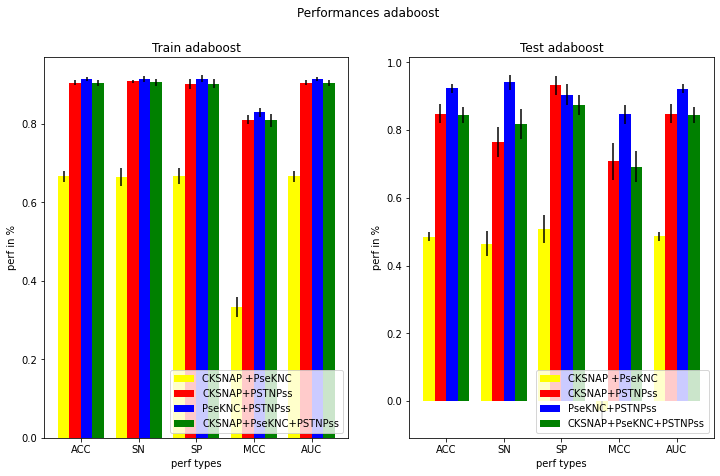

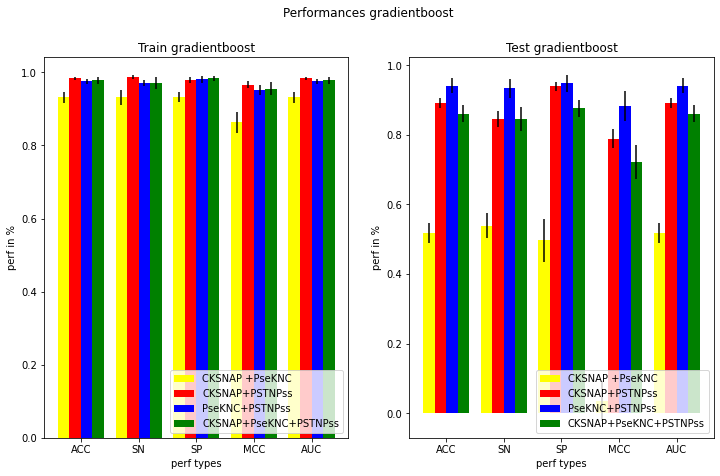

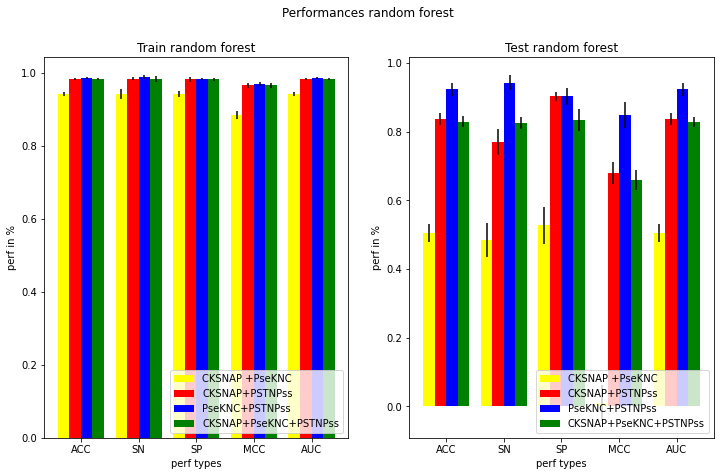

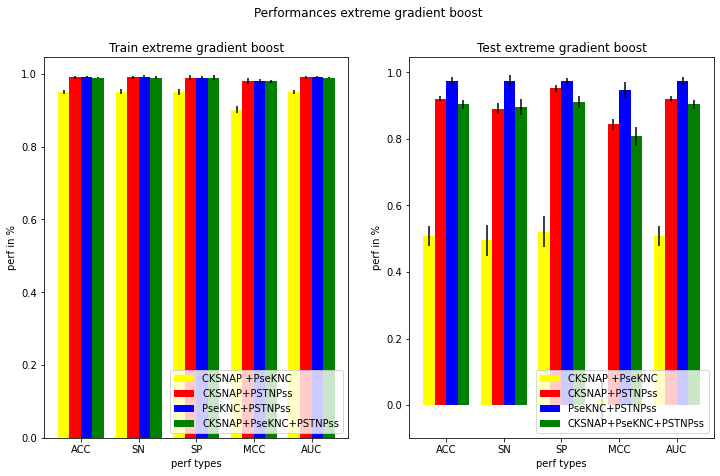

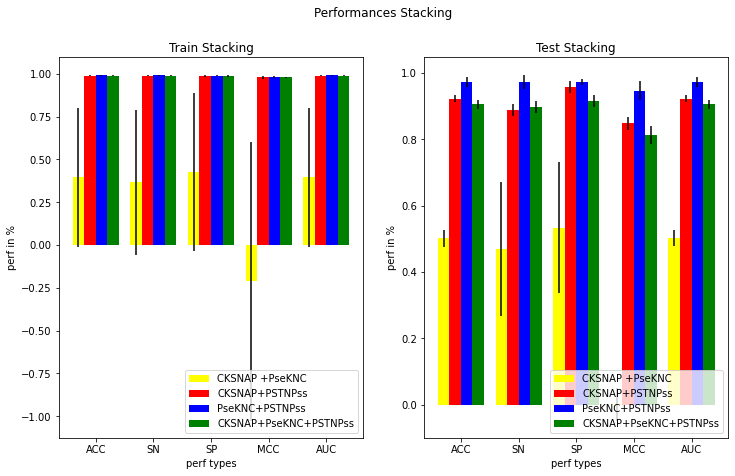

In [47]:
Plot_Performances_RNA_fusion(AB_tot_perf_train,AB_tot_perf_test, 'adaboost')
Plot_Performances_RNA_fusion(GB_tot_perf_train,GB_tot_perf_test, 'gradientboost')
Plot_Performances_RNA_fusion(RF_tot_perf_train,RF_tot_perf_test, 'random forest')
Plot_Performances_RNA_fusion(XGB_tot_perf_train,XGB_tot_perf_test, 'extreme gradient boost')
Plot_Performances_RNA_fusion(Stacking_tot_perf_train,Stacking_tot_perf_test, 'Stacking')

In [45]:
total_y_pred_train1,total_y_true_train1,total_y_pred_test1,total_y_true_test1 =Run_ML(nCV,t_vec_train1,t_vec_val1,t_vec_test1,'Stacked1')
total_y_pred_train2,total_y_true_train2,total_y_pred_test2,total_y_true_test2 =Run_ML(nCV,t_vec_train2,t_vec_val2,t_vec_test2,'Stacked2')
total_y_pred_train3,total_y_true_train3,total_y_pred_test3,total_y_true_test3 =Run_ML(nCV,t_vec_train3,t_vec_val3,t_vec_test3,'Stacked3')
total_y_pred_train4,total_y_true_train4,total_y_pred_test4,total_y_true_test4 =Run_ML(nCV,t_vec_train4,t_vec_val4,t_vec_test4,'Stacked4')

Stacking_total_performances_train1,Stacking_total_performances_test1 = Total_Performances(nCV, total_y_pred_train1,total_y_true_train1,
                                                                         total_y_pred_test1,total_y_true_test1)
Stacking_total_performances_train2,Stacking_total_performances_test2 = Total_Performances(nCV, total_y_pred_train2,total_y_true_train2,
                                                                         total_y_pred_test2,total_y_true_test2)
Stacking_total_performances_train3,Stacking_total_performances_test3 = Total_Performances(nCV, total_y_pred_train3,total_y_true_train3,
                                                                         total_y_pred_test3,total_y_true_test3)
Stacking_total_performances_train4,Stacking_total_performances_test4 = Total_Performances(nCV, total_y_pred_train4,total_y_true_train4,
                                                                         total_y_pred_test4,total_y_true_test4)

In [46]:
print(statistics.mean(Stacking_total_performances_test2[0]))
print(statistics.mean(Stacking_total_performances_test3[0]))
print(statistics.mean(Stacking_total_performances_test4[0]))

0.92255
0.9729300000000001
0.90602


In [48]:
pValue1

0      0.679960
1      0.485827
2      0.471614
3      0.376809
4      0.184053
         ...   
125    0.675974
126    0.726128
127    0.246609
128    0.754074
129    0.969375
Length: 130, dtype: float64

In [49]:
pValue1.to_csv('P-Value/pValue1.csv')
pValue2.to_csv('P-Value/pValue2.csv')  
pValue3.to_csv('P-Value/pValue3.csv')  
pValue4.to_csv('P-Value/pValue4.csv')

In [50]:
len(X_4[0])

169

In [51]:
len(list_bad_feature1)

109

In [53]:
list_bad_feature1 = get_bad_features(pValue1,thr)
list_bad_feature2 = get_bad_features(pValue2,thr)
list_bad_feature3 = get_bad_features(pValue3,thr)
list_bad_feature4 = get_bad_features(pValue4,thr)

In [54]:
print(len(list_bad_feature1))
print(len(list_bad_feature2))
print(len(list_bad_feature3))
print(len(list_bad_feature4))

109
80
85
138


In [55]:
save('list_bad_feature1.npy',list_bad_feature1)
save('list_bad_feature2.npy',list_bad_feature2)
save('list_bad_feature3.npy',list_bad_feature3)
save('list_bad_feature4.npy',list_bad_feature4)

In [59]:
X_test3.shape

(133, 105)

In [60]:
import joblib
loaded_model = joblib.load('Stacked_model/Stacked3_fold0.joblib')
result = loaded_model.score(X_test31, y_test3_np)

In [61]:
result

0.9774436090225563